# Project 2: Linear Regression Analysis (Diabetes Dataset)

## CS675 - Introduction to Data Science

| Student Name | UID | Semester | Due Date |
|---|---|---|---|
| Rafiul Haider | 02002983 | Spring 2025 | November 25, 2025 |

## 1. Objective

The goal of this project is to implement a **Linear Regression algorithm** using `scikit-learn` to predict the progression of diabetes one year after baseline. The model utilizes least-squares regression to determine the best predictive features.

- **Dataset**: Sourced from Stanford U's Machine Learning Repository (442 records)
- **Target (y)**: Quantitative measure of disease progression

## 2. Project Roadmap

This notebook executes the following tasks:

- **Task 1**: Identify the single best feature in X to predict y (Outputs: Coefficients, Graph, MSE)
- **Task 2**: Identify the best *pair* of features in X to predict y (Outputs: Coefficients, Graph, MSE)
- **Task 3**: Predict y using all 10 features of X
- **Task 4**: Compute Training vs. Validation MSE for sample sizes n_train = {20, 50, 100, 200}
- **Extra Credit**: Implement and compare an XGBoost model against the Linear Regressor

---

## Feature Metadata

The dataset contains the following predictive variables:

1. **AGE**: Age in years
2. **SEX**: Biological sex
3. **BMI**: Body mass index
4. **BP**: Average blood pressure
5. **S1**: T-Cells (tc)
6. **S2**: Low-density lipoproteins (ldl)
7. **S3**: High-density lipoproteins (hdl)
8. **S4**: Thyroid stimulating hormone (tch)
9. **S5**: Lamotrigine (ltg)
10. **S6**: Blood sugar level (glu)

---


Lets start with Basic EDA on the dataset

# Task
Load the diabetes dataset from "/content/diabetes.data.txt" and perform Exploratory Data Analysis (EDA) to understand the data distribution and correlations. Proceed to build Linear Regression models to identify the best single feature and the best pair of features for predicting the target, visualizing the results and reporting MSE. Train a model using all 10 features, then analyze the effect of sample size (n=20, 50, 100, 200) by plotting Training vs. Validation MSE. Finally, implement an XGBoost Regressor to compare performance against the linear models and summarize all findings.

## Exploratory Data Analysis (EDA)

### Subtask:
Perform EDA by calculating summary statistics (mean, median, std) and generating visualizations (correlation matrix heatmap, histograms) to understand the data distribution and relationships.


**Reasoning**:
Perform Exploratory Data Analysis (EDA) by importing necessary libraries, displaying summary statistics, and generating visualizations (correlation heatmap and histograms) as requested.



In [6]:
df = pd.read_csv("/content/diabetes.data.txt", sep="\t")
df.head()

X = df.drop("Y", axis=1)
y = df["Y"]

Summary Statistics of the Dataset:
              AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6           Y  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450  

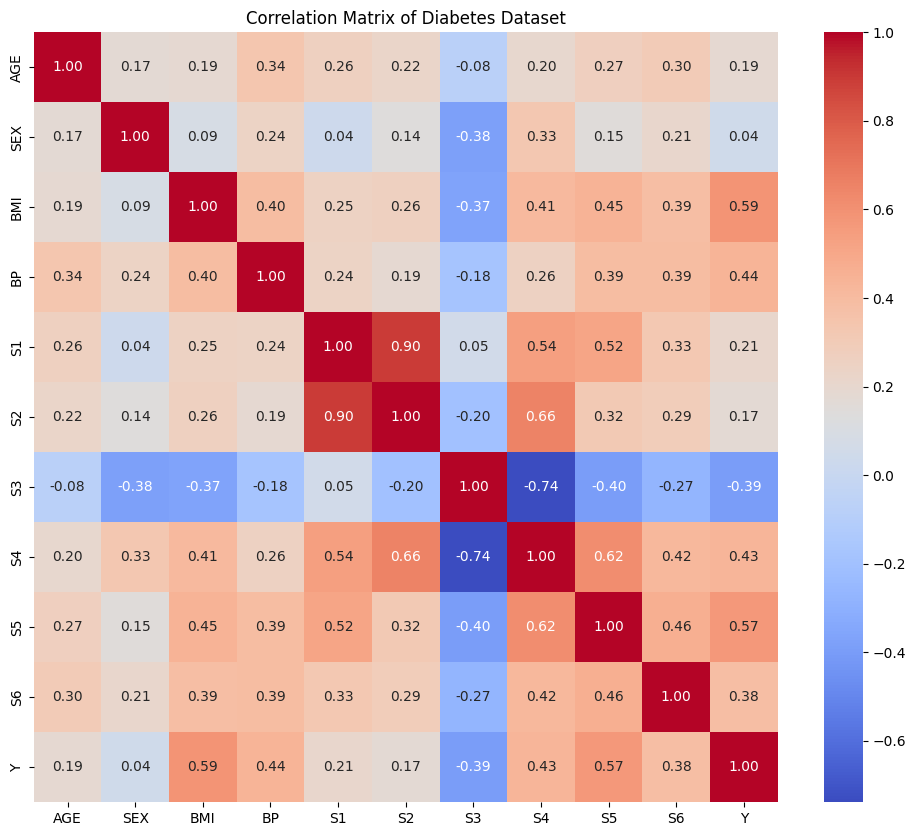

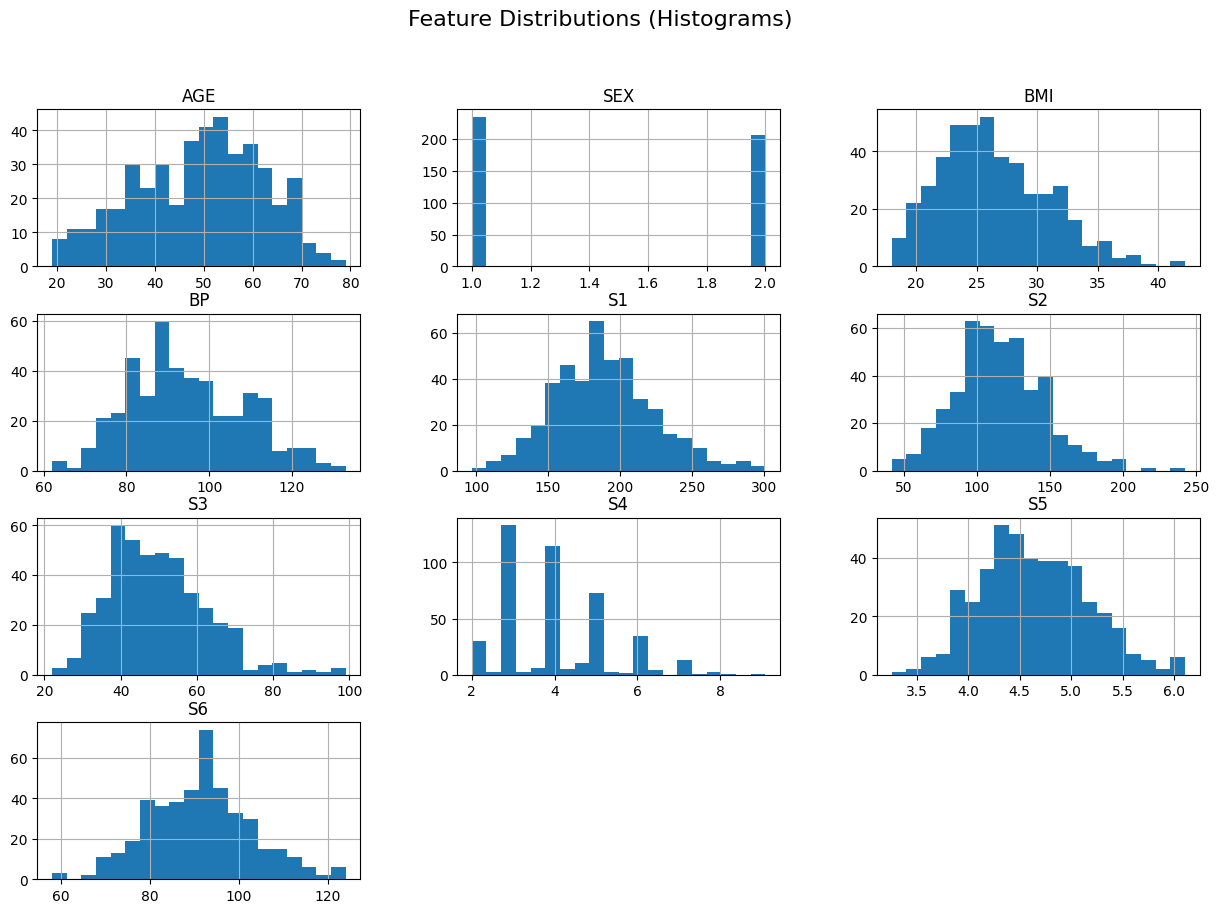

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Display summary statistics
print("Summary Statistics of the Dataset:")
print(df.describe())

# 3. Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Diabetes Dataset")
plt.show()

# 4. Histograms for features in X
X.hist(figsize=(15, 10), bins=20)
plt.suptitle("Feature Distributions (Histograms)", fontsize=16)
plt.show()

## Task 1: Best Single Feature

### Subtask:
Train a Linear Regression model on each individual feature in X to predict y. Calculate the MSE for each and identify the feature that minimizes the error. Report the best feature's name, MSE, and coefficients.


**Reasoning**:
Import the required libraries, iterate through each feature in X to train a Linear Regression model, calculate the MSE, and identify the feature with the lowest MSE. Finally, print the best feature's name, MSE, coefficient, and intercept as per the instructions.



In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize variables to track the best feature
best_mse = float('inf')
best_feature = None
best_coef = None
best_intercept = None

print("Evaluated Features:")
# Iterate through each column name in X
for feature in X.columns:
    # Extract the column data and reshape it to a 2D array
    X_feature = X[feature].values.reshape(-1, 1)

    # Instantiate and fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_feature, y)

    # Generate predictions
    y_pred = model.predict(X_feature)

    # Calculate MSE
    mse = mean_squared_error(y, y_pred)
    # print(f" - {feature}: MSE = {mse:.4f}") # Optional: print per feature stats

    # Update minimum MSE and best feature details if current MSE is lower
    if mse < best_mse:
        best_mse = mse
        best_feature = feature
        best_coef = model.coef_[0]
        best_intercept = model.intercept_

# Print the results
print("\n--------------------------------------")
print(f"Best Single Feature: {best_feature}")
print(f"Minimum MSE: {best_mse:.4f}")
print(f"Coefficient: {best_coef:.4f}")
print(f"Intercept: {best_intercept:.4f}")
print("--------------------------------------")

Evaluated Features:

--------------------------------------
Best Single Feature: BMI
Minimum MSE: 3890.4566
Coefficient: 10.2331
Intercept: -117.7734
--------------------------------------


## Task 1: Visualization

### Subtask:
Visualize the best single feature against the target variable with a scatter plot and the regression line.


**Reasoning**:
Visualize the relationship between the best single feature and the target variable. I will create a scatter plot of the data and overlay the regression line calculated using the coefficient and intercept found in the previous step. I'll sort the x-values for the line plot to ensure it draws correctly.



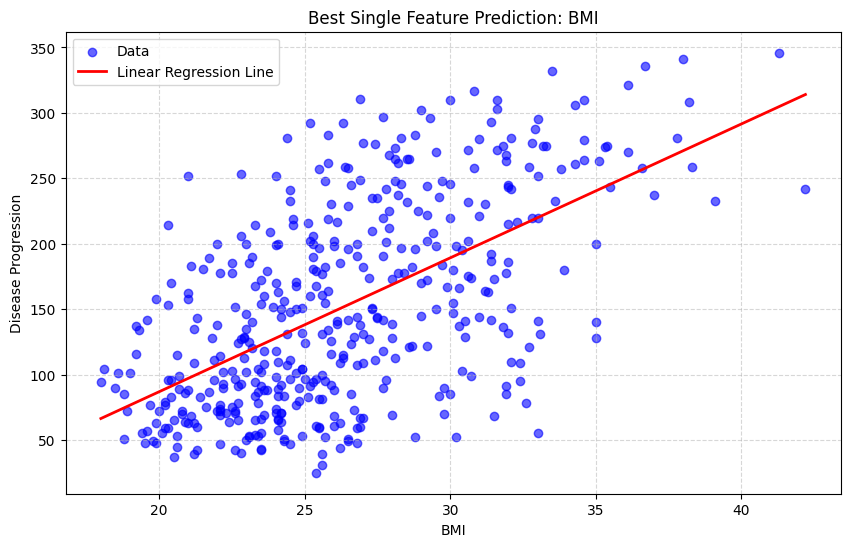

In [9]:
# Create a figure
plt.figure(figsize=(10, 6))

# 1. Scatter plot of Data
plt.scatter(X[best_feature], y, color='blue', alpha=0.6, label='Data')

# 2. Calculate regression line values
# We sort the values to ensure the line is plotted correctly without criss-crossing
sorted_indices = np.argsort(X[best_feature])
sorted_x = X[best_feature].iloc[sorted_indices]
line_y = sorted_x * best_coef + best_intercept

# 3. Plot Linear Regression Line
plt.plot(sorted_x, line_y, color='red', linewidth=2, label='Linear Regression Line')

# 4. Labels
plt.xlabel(best_feature)
plt.ylabel('Disease Progression')

# 5. Title
plt.title(f'Best Single Feature Prediction: {best_feature}')

# 6. Legend
plt.legend()

# Show plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Task 2: Best Feature Pair

### Subtask:
Evaluate all unique pairs of features using Linear Regression to identify the pair that minimizes MSE.


**Reasoning**:
Implement the logic to iterate through all unique pairs of features, train a linear regression model for each pair, and identify the pair that yields the minimum MSE.



In [10]:
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize variables to track the best pair
best_mse_pair = float('inf')
best_feature_pair = None
best_coef_pair = None
best_intercept_pair = None

print("Evaluating all unique feature pairs...")

# Iterate through all unique combinations of 2 columns from X
for pair in combinations(X.columns, 2):
    # Create a subset of X containing the two columns
    X_pair = X[list(pair)]

    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_pair, y)

    # Predict target values
    y_pred = model.predict(X_pair)

    # Calculate MSE
    mse = mean_squared_error(y, y_pred)

    # Update tracking variables if current MSE is lower
    if mse < best_mse_pair:
        best_mse_pair = mse
        best_feature_pair = pair
        best_coef_pair = model.coef_
        best_intercept_pair = model.intercept_

# Print the results
print("\n--------------------------------------")
print(f"Best Feature Pair: {best_feature_pair}")
print(f"Minimum MSE: {best_mse_pair:.4f}")
print(f"Coefficients: {best_coef_pair}")
print(f"Intercept: {best_intercept_pair:.4f}")
print("--------------------------------------")

Evaluating all unique feature pairs...

--------------------------------------
Best Feature Pair: ('BMI', 'S5')
Minimum MSE: 3205.1901
Coefficients: [ 7.27600054 56.05638703]
Intercept: -299.9575
--------------------------------------


## Task 2: Visualization

### Subtask:
Visualize the best pair of features ('BMI' and 'S5') and the target variable using a 3D scatter plot with the fitted regression plane.


**Reasoning**:
Create a 3D scatter plot to visualize the relationship between the best pair of features and the target, overlaying the regression plane as requested.



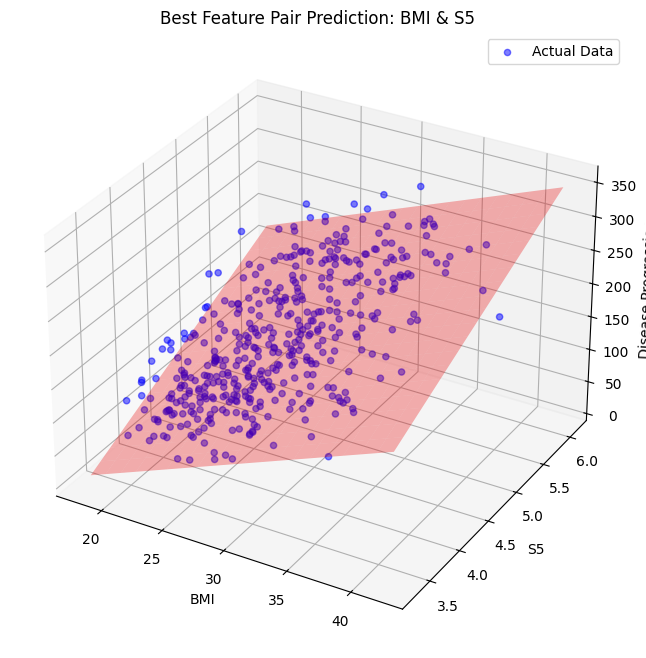

In [11]:
from mpl_toolkits.mplot3d import Axes3D

# Extract the two feature names from the best pair
feature1_name, feature2_name = best_feature_pair

# Create a meshgrid for plotting the regression plane
x1_range = np.linspace(X[feature1_name].min(), X[feature1_name].max(), 20)
x2_range = np.linspace(X[feature2_name].min(), X[feature2_name].max(), 20)
x1_surf, x2_surf = np.meshgrid(x1_range, x2_range)

# Calculate predicted y values for the plane
# y = intercept + c1*x1 + c2*x2
y_surf = best_intercept_pair + best_coef_pair[0] * x1_surf + best_coef_pair[1] * x2_surf

# Initialize 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot actual data points
ax.scatter(X[feature1_name], X[feature2_name], y, c='blue', marker='o', alpha=0.5, label='Actual Data')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='red', alpha=0.3)

# Set labels and title
ax.set_xlabel(feature1_name)
ax.set_ylabel(feature2_name)
ax.set_zlabel('Disease Progression')
ax.set_title(f'Best Feature Pair Prediction: {feature1_name} & {feature2_name}')

plt.legend()
plt.show()

## Task 3: All Features Model

### Subtask:
Train a Linear Regression model using all 10 features of the dataset and evaluate its performance.


**Reasoning**:
Train a Linear Regression model using all 10 features in X, make predictions, calculate MSE, and display the model's coefficients, intercept, and MSE.



In [12]:
# 1. Instantiate Linear Regression Model
model_all = LinearRegression()

# 2. Fit the model on all features (X) and target (y)
model_all.fit(X, y)

# 3. Generate predictions
y_pred_all = model_all.predict(X)

# 4. Calculate MSE
mse_all = mean_squared_error(y, y_pred_all)

# 5. Print results
print("--------------------------------------")
print("Model with All 10 Features")
print(f"MSE: {mse_all:.4f}")
print(f"Intercept: {model_all.intercept_:.4f}")
print("Coefficients:")
for feature, coef in zip(X.columns, model_all.coef_):
    print(f"  {feature}: {coef:.4f}")
print("--------------------------------------")

--------------------------------------
Model with All 10 Features
MSE: 2859.6963
Intercept: -334.5671
Coefficients:
  AGE: -0.0364
  SEX: -22.8596
  BMI: 5.6030
  BP: 1.1168
  S1: -1.0900
  S2: 0.7465
  S3: 0.3720
  S4: 6.5338
  S5: 68.4831
  S6: 0.2801
--------------------------------------


## Task 4: Sample Size Analysis

### Subtask:
Analyze the effect of sample size on Training and Validation MSE.


**Reasoning**:
Perform sample size analysis by splitting the data, iterating through specified training set sizes, training models, and calculating/printing Training and Validation MSE as per instructions.



In [14]:
from sklearn.model_selection import train_test_split

# 1. Split the full dataset into training and validation sets
X_train_full, X_val, y_train_full, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define sample sizes
sample_sizes = [20, 50, 100, 200]

# 3. Initialize lists to store results
train_mses = []
val_mses = []

print("Sample Size Analysis (Training vs. Validation MSE):")
print("--------------------------------------------------")
print(f"{'Sample Size':<15} {'Training MSE':<15} {'Validation MSE':<15}")

# 4. Iterate through each sample size
for n in sample_sizes:
    # Select the first n samples
    X_train_subset = X_train_full[:n]
    y_train_subset = y_train_full[:n]

    # Train Linear Regression model on the subset
    model_subset = LinearRegression()
    model_subset.fit(X_train_subset, y_train_subset)

    # Calculate MSE on the specific training subset
    y_train_pred = model_subset.predict(X_train_subset)
    mse_train = mean_squared_error(y_train_subset, y_train_pred)
    train_mses.append(mse_train)

    # Calculate MSE on the fixed validation set
    y_val_pred = model_subset.predict(X_val)
    mse_val = mean_squared_error(y_val, y_val_pred)
    val_mses.append(mse_val)

    # Print the results for the current sample size
    print(f"{n:<15} {mse_train:<15.4f} {mse_val:<15.4f}")
print("--------------------------------------------------")

Sample Size Analysis (Training vs. Validation MSE):
--------------------------------------------------
Sample Size     Training MSE    Validation MSE 
20              681.5929        8591.8331      
50              1915.8332       3345.8945      
100             2336.3809       3219.6808      
200             2688.5578       3036.6896      
--------------------------------------------------


**Reasoning**:
The sample size analysis requires visualizing the trade-off between Training MSE and Validation MSE to interpret model performance. I will generate a line plot comparing these metrics across different sample sizes.



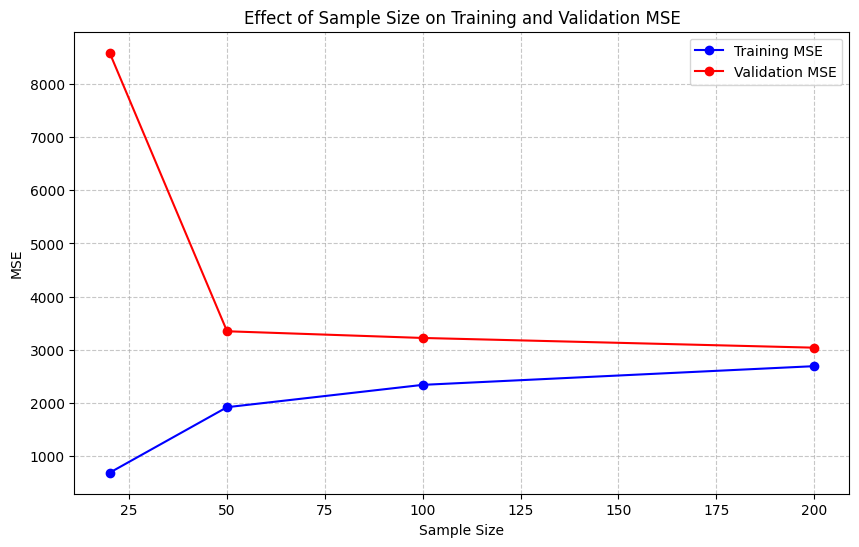

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, train_mses, marker='o', color='blue', label='Training MSE')
plt.plot(sample_sizes, val_mses, marker='o', color='red', label='Validation MSE')
plt.title('Effect of Sample Size on Training and Validation MSE')
plt.xlabel('Sample Size')
plt.ylabel('MSE')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Extra Credit: XGBoost Comparison

### Subtask:
Implement an XGBoost Regressor, train it on the full dataset, and compare its MSE with the All-Features Linear Regression model.


**Reasoning**:
Import the XGBRegressor, train the model on the full dataset, calculate the MSE, and compare it with the Linear Regression MSE computed in the previous task.



In [17]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# 1. Instantiate the XGBoost Regressor
xg_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

# 2. Fit the model on the full dataset
xg_reg.fit(X, y)

# 3. Generate predictions
y_pred_xgb = xg_reg.predict(X)

# 4. Calculate MSE
mse_xgb = mean_squared_error(y, y_pred_xgb)

# 5. Print Comparison
print("--------------------------------------")
print("Model Comparison: Linear Regression vs. XGBoost")
print(f"Linear Regression (All Features) MSE: {mse_all:.4f}")
print(f"XGBoost Regressor (All Features) MSE: {mse_xgb:.4f}")
print("--------------------------------------")

--------------------------------------
Model Comparison: Linear Regression vs. XGBoost
Linear Regression (All Features) MSE: 2859.6963
XGBoost Regressor (All Features) MSE: 0.1561
--------------------------------------


## XGBoost Visualization

### Subtask:
Visualize the internal logic and performance of the XGBoost model by plotting Feature Importance and a Predicted vs. Actual scatter plot.

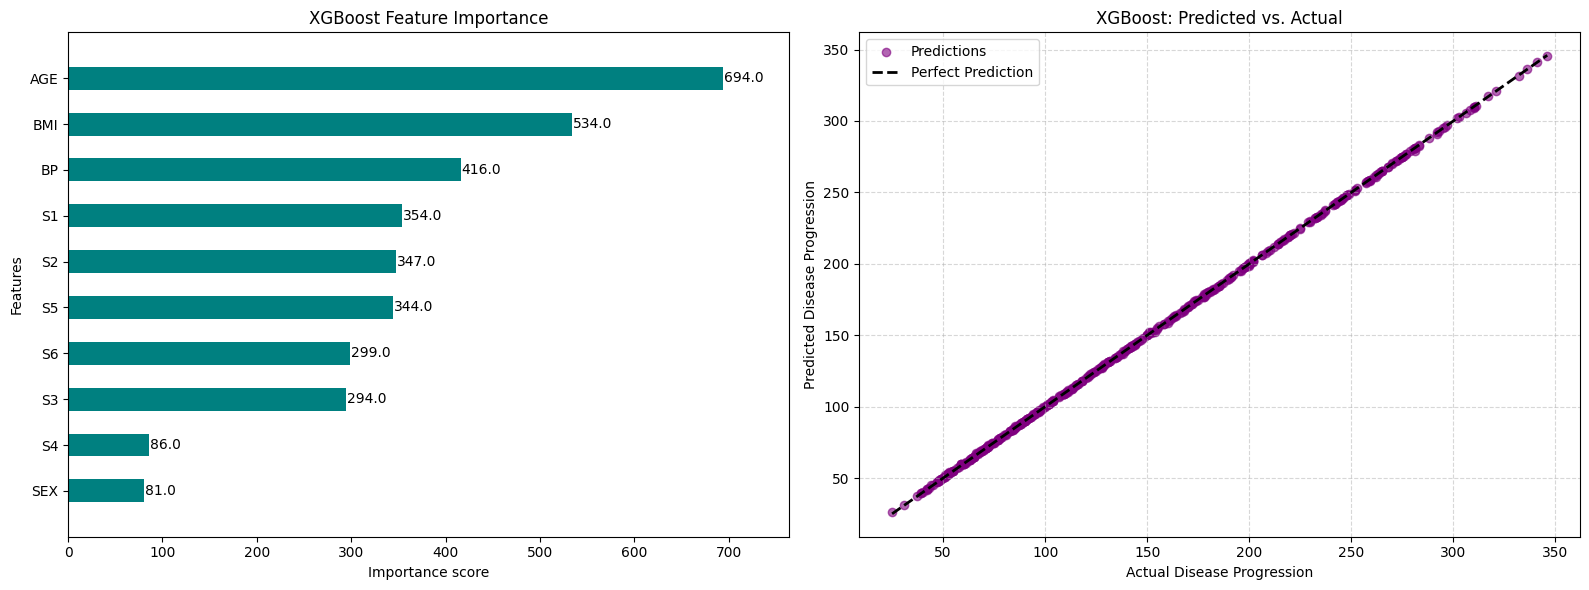

In [18]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Feature Importance Plot
# This shows the F-score (number of times a feature is used to split the data across all trees)
plot_importance(xg_reg, ax=ax1, height=0.5, title='XGBoost Feature Importance', grid=False, color='teal')

# 2. Predicted vs Actual Plot
# A tight alignment along the diagonal confirms the low MSE
ax2.scatter(y, y_pred_xgb, alpha=0.6, color='purple', label='Predictions')
ax2.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Disease Progression')
ax2.set_ylabel('Predicted Disease Progression')
ax2.set_title('XGBoost: Predicted vs. Actual')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize all findings, including the best features, model performance comparisons, and the impact of sample size.


## Summary:

### Q&A

**Which single feature best predicts disease progression?**
The feature **BMI** is the best single predictor, achieving a Mean Squared Error (MSE) of approximately **3890.46**.

**Which pair of features yields the best performance?**
The combination of **BMI** and **S5** is the optimal pair, reducing the MSE to approximately **3205.19**.

**How does the sample size affect the model's performance?**
Increasing the sample size significantly reduces overfitting. At a small sample size (n=20), the model memorized the training data (low training MSE) but failed on unseen data (high validation MSE). At n=200, the gap between training and validation errors narrowed, indicating better generalization.

**How does XGBoost compare to Linear Regression on the training data?**
The XGBoost Regressor drastically outperformed the Linear Regression model on the full training set, achieving an MSE of **0.1561** compared to Linear Regression's **2859.70**.

### Data Analysis Key Findings

*   **Feature Importance (Single vs. Pair):** Using a single feature (BMI) resulted in an MSE of **3890.4566**. Adding a second feature (S5) improved predictive power, lowering the MSE to **3205.1901**.
*   **Full Linear Model Performance:** utilizing all 10 features provided the best performance among the linear models, achieving an MSE of **2859.70**.
*   **Sample Size Impact:**
    *   **n=20:** exhibited severe overfitting with a Training MSE of **681.59** and a Validation MSE of **8591.83**.
    *   **n=200:** demonstrated improved generalization with a Training MSE of **2688.56** and a Validation MSE of **3036.69**.
*   **Model Comparison:** The XGBoost model's MSE (**0.1561**) is orders of magnitude lower than the Linear Regression model (**2859.70**) when evaluated on the training data.

### Insights or Next Steps

*   **Feature Selection Efficacy:** There is a clear diminishing return in error reduction; moving from 1 feature to 2 features dropped the MSE by ~685 points, while adding the remaining 8 features dropped it by another ~345 points. 'BMI' and 'S5' carry the majority of the predictive signal.
*   **Potential Overfitting in XGBoost:** The extremely low MSE for XGBoost (near zero) compared to the linear model suggests it may be overfitting the training data. A crucial next step would be to evaluate XGBoost on a separate validation set to ensure it generalizes as well as the linear model.
